# Erosion and Dilation
- Erosion and dilation are two morphological image operations
- They are used to extract the relevant structures of the image
- This is achieved by probing the image with a *Structuring Element*
- The shape of SE can be chosen according to some knowledge about the relevant (shapes) and irrelevant (noise) structures in the image



# Erosion

##### Erosion is a fundamental operation in image processing used for removing small details and noise from images. It is primarily applied in binary images, but it can also be used in grayscale images. Erosion works by "shrinking" the shapes in an image. (Another heuristic is "Does the structuring element fit the image")

1. Binary Erosion:
In binary erosion, the basic idea is to slide a structuring element (a small binary image) over the input image. At each position, if the structuring element perfectly fits within the image region being examined, the center pixel of the structuring element in the output image is set to 1. Otherwise, it is set to 0.

 2. Grayscale Erosion:
 Here, instead of just checking if the structuring element fits, the minimum pixel value within the overlapped region is chosen for the output pixel.

Formulas:
Let A be the input image and B be the structuring element. The erosion operation ε can be mathematically defined as:

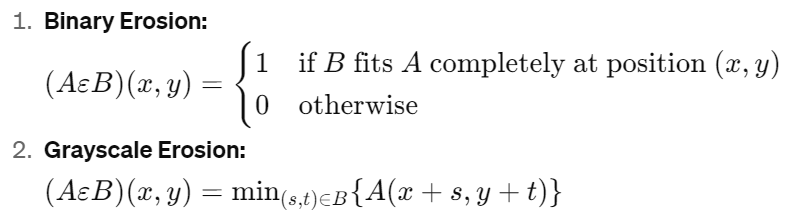

In this example, each pixel value in the output image is the minimum value within the 3x3 neighborhood centered around the corresponding pixel in the input image.

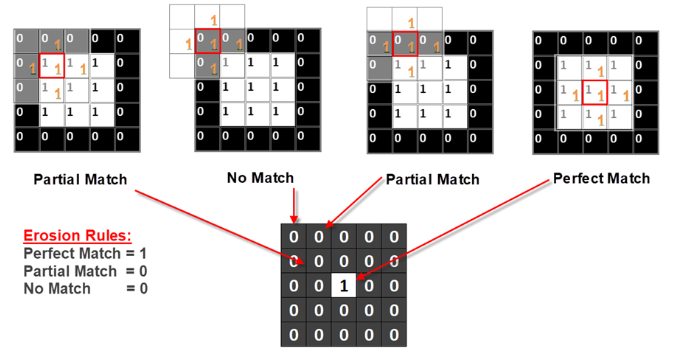

https://www.youtube.com/watch?v=b5lgnNEzGeU

Erosion summary:
- This operation is the sister of dilation. It computes a local minimum over the area of given kernel.
- As the kernel B is scanned over the image, we compute the minimal pixel value overlapped by B and replace the image pixel under the anchor point with that minimal value.
- The erosion operation is: $dst(x,y)=min(x′,y′):element(x′,y′)≠0 src(x+x′,y+y′)$

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.morphology import erosion, dilation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from ipywidgets import interact

Let's create a shape - a circle and a kernel - cross

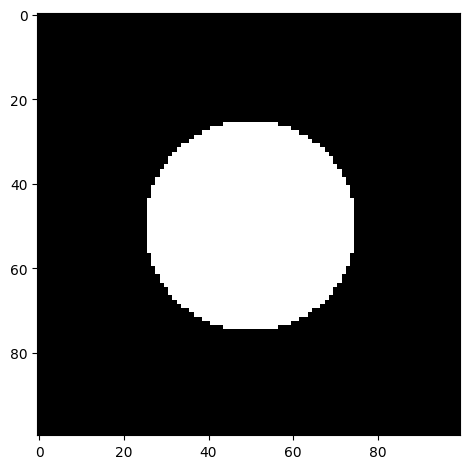

In [13]:
circ_image = np.zeros((100, 100))
rr, cc = disk((50, 50), 25)
circ_image[rr, cc] = 1
imshow(circ_image)

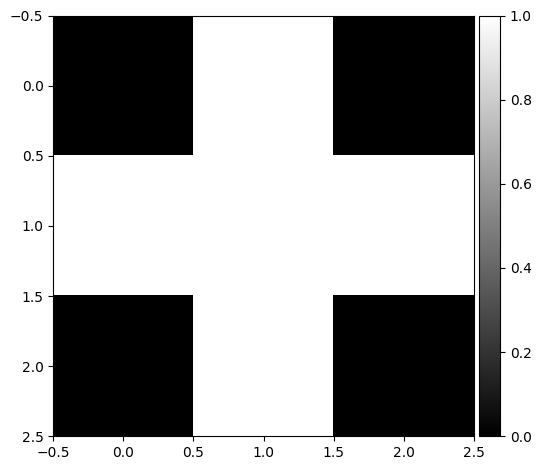

In [14]:
cross = np.array([[0,1,0],
                  [1,1,1],
                  [0,1,0]])
imshow(cross, cmap = 'gray')

In [15]:
eroded_circle = erosion(circ_image, cross)

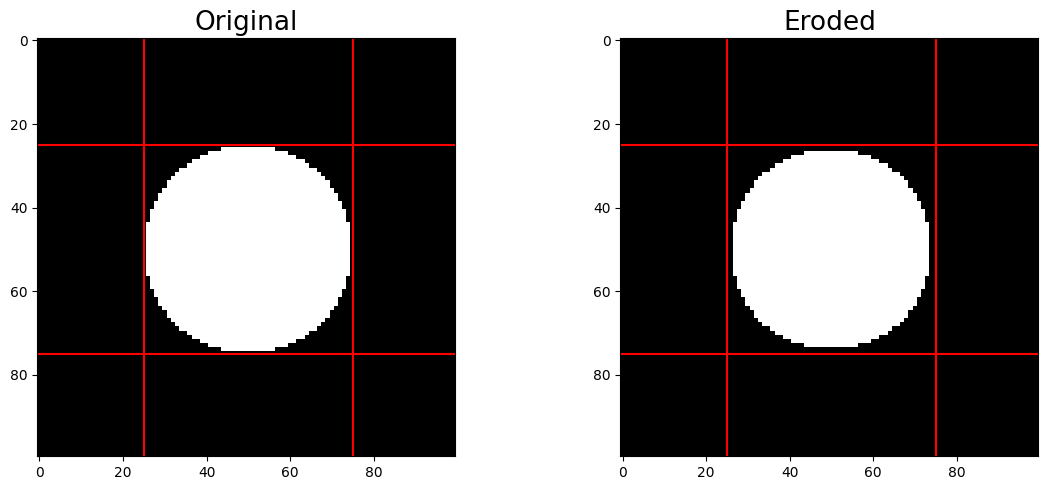

In [16]:
linecolor = 'red'
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(circ_image, cmap = 'gray');
ax[0].set_title('Original', fontsize = 19)
ax[0].axvline(x = 25, color = linecolor)
ax[0].axvline(x = 75, color = linecolor)
ax[0].axhline(y = 25, color = linecolor)
ax[0].axhline(y = 75, color = linecolor)
ax[1].imshow(eroded_circle, cmap = 'gray');
ax[1].set_title('Eroded', fontsize = 19)
ax[1].axvline(x = 25, color = linecolor)
ax[1].axvline(x = 75, color = linecolor)
ax[1].axhline(y = 25, color = linecolor)
ax[1].axhline(y = 75, color = linecolor)
fig.tight_layout()

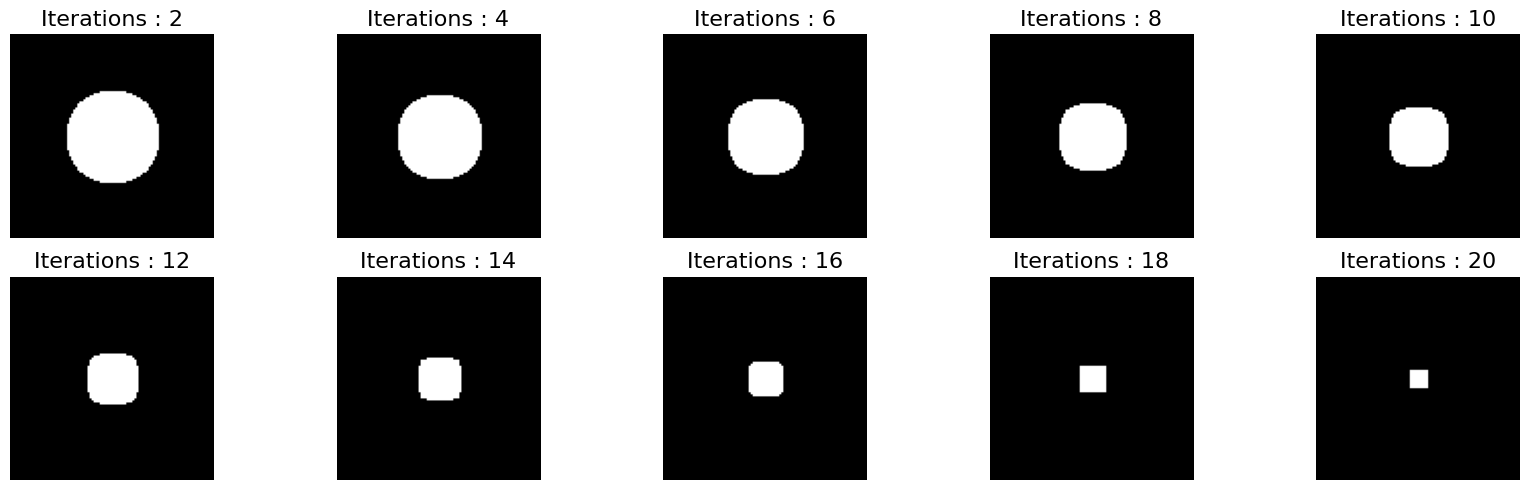

In [17]:
def multi_erosion(image, kernel, iterations):
    for i in range(iterations):
        image = erosion(image, kernel)
    return image
ites = [2,4,6,8,10,12,14,16,18,20]
fig, ax = plt.subplots(2, 5, figsize=(17, 5))
for n, ax in enumerate(ax.flatten()):
    ax.set_title(f'Iterations : {ites[n]}', fontsize = 16)
    new_circle = multi_erosion(circ_image, cross, ites[n])
    ax.imshow(new_circle, cmap = 'gray')
    ax.axis('off')
fig.tight_layout()

In [18]:
import cv2

image = cv2.imread('OIP.jpg', 0)
image = 255 - image
kernel = np.ones((1,8), np.uint8)
print(kernel)

erosion = cv2.erode(image, kernel, iterations = 2)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(image, cmap='gray')
ax[1].imshow(erosion, cmap='gray')
fig.tight_layout()


[ WARN:0@20.946] global loadsave.cpp:248 findDecoder imread_('OIP.jpg'): can't open/read file: check file path/integrity


TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

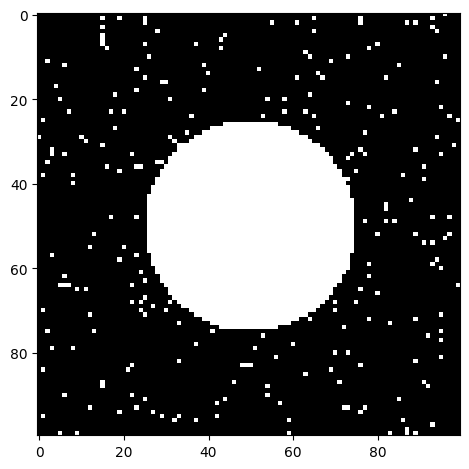

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import disk
from skimage.io import imshow

# Create a black image
circ_image = np.zeros((100, 100))

# Draw a white circle in the image
rr, cc = disk((50, 50), 25)
circ_image[rr, cc] = 1

# Create a mask for the area outside the circle
outside_circle_mask = np.ones_like(circ_image)
outside_circle_mask[rr, cc] = 0
probabilities = [0.97, 0.03]
# Add noise to the area outside the circle
noise = np.random.choice([0, 1], size=circ_image.shape, p=probabilities)

noisy_image = circ_image + outside_circle_mask * noise

# Show the image with noise
imshow(noisy_image, cmap='gray')
plt.show()


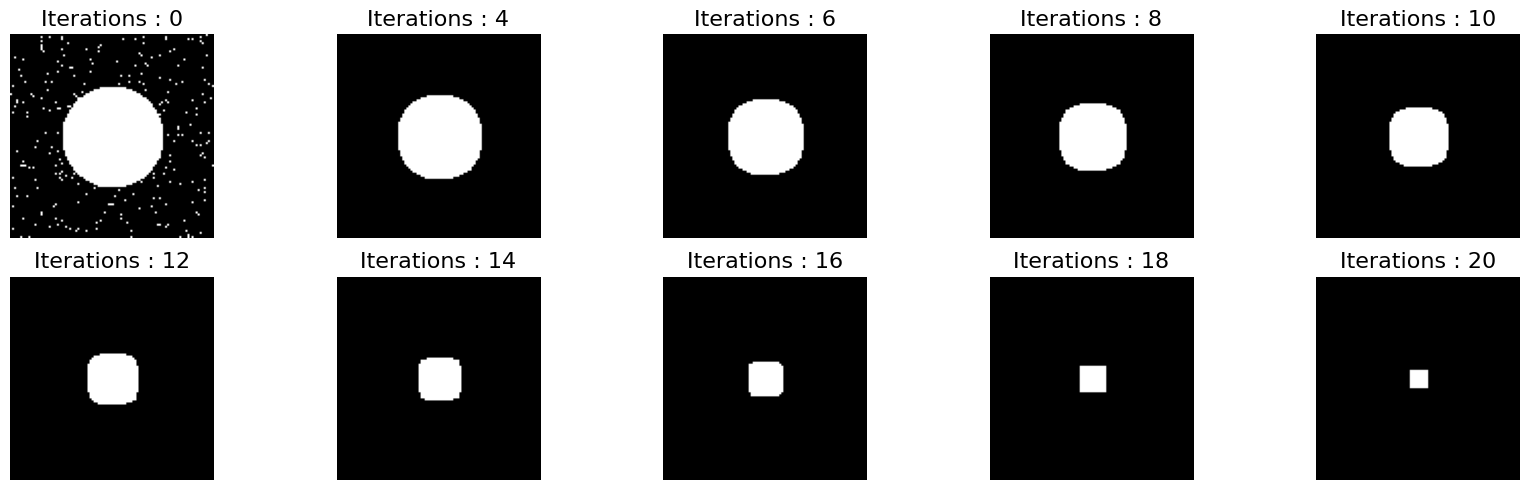

In [20]:
def multi_erosion(image, kernel, iterations):
    for i in range(iterations):
        image = erosion(image, kernel)
    return image
ites = [0,4,6,8,10,12,14,16,18,20]
fig, ax = plt.subplots(2, 5, figsize=(17, 5))
for n, ax in enumerate(ax.flatten()):
    ax.set_title(f'Iterations : {ites[n]}', fontsize = 16)
    new_circle = multi_erosion(noisy_image, cross, ites[n])
    ax.imshow(new_circle, cmap = 'gray')
    ax.axis('off')
fig.tight_layout()

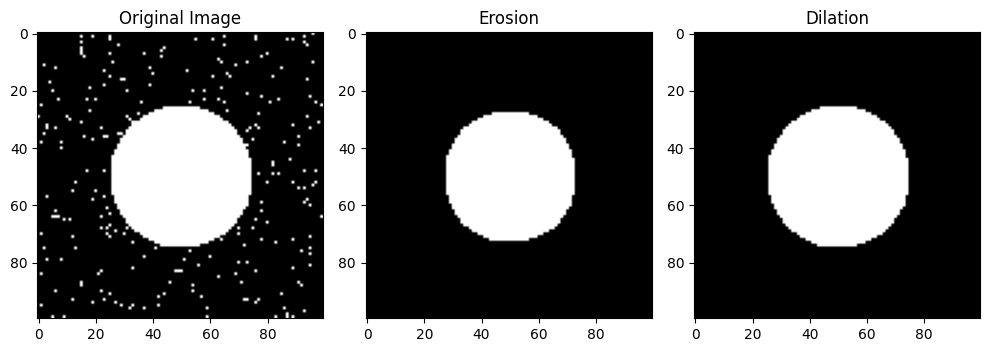

In [21]:

''' full 3x3'''
kernel = np.ones((3, 3), np.uint8)

''' cross kernel '''
kernel = [[0,1,0], [1,1,1], [0, 1, 0]]
kernel = np.array(kernel, np.uint8)

erosion = cv2.erode(noisy_image, kernel, iterations=2)

dilation = cv2.dilate(erosion, kernel, iterations=2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(erosion, cmap='gray')
plt.title('Erosion')

plt.subplot(1, 3, 3)
plt.imshow(dilation, cmap='gray')
plt.title('Dilation')

plt.tight_layout()
plt.show()

# Dilation
Dilation is the dual operator of the Erosion. Dilation expands the image. The dilated set are all the points, where the answer to the question "Does the structuing element hit the set?" is affirmative.

![img/Dilation.png](img/Dilation.png)
![dilation gif](img/Grayscale_Morphological_Dilation.gif)



In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, fixed, Dropdown

def apply_dilation(image, dilation_value, kernel_size, kernel_type):
    match kernel_type:
        case 'Rectangular':
            kernel = np.ones((kernel_size, kernel_size), np.uint8)
        case 'Circular':
            kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
        case 'Cross':
            kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size))

    result = cv2.dilate(image, kernel, iterations=dilation_value)
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

def apply_erosion(image, erosion_value, kernel_size, kernel_type):
    match kernel_type:
        case 'Rectangular':
            kernel = np.ones((kernel_size, kernel_size), np.uint8)
        case 'Circular':
            kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
        case 'Cross':
            kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size))

    result = cv2.erode(image, kernel, iterations=erosion_value)
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [23]:
image = cv2.imread('img/digit.png')

kernel_choices = ['Rectangular', 'Circular', 'Cross']
dilation_slider = IntSlider(min=0, max=10, step=1, value=5, description='Dilation')
erosion_slider = IntSlider(min=0, max=10, step=1, value=5, description='Erosion')
dilation_kernel_type_dropdown = Dropdown(options=kernel_choices, value='Rectangular', description='Kernel Type:')
dilation_kernel_size_slider = IntSlider(min=1, max=15, step=1, value=5, description='Kernel Size:')
erosion_kernel_type_dropdown = Dropdown(options=kernel_choices, value='Rectangular', description='Kernel Type:')
erosion_kernel_size_slider = IntSlider(min=1, max=15, step=1, value=5, description='Kernel Size:')

interact(
    apply_dilation,
    image=fixed(image),
    dilation_value=dilation_slider,
    kernel_type=dilation_kernel_type_dropdown,
    kernel_size=dilation_kernel_size_slider,
)

interact(
    apply_erosion,
    image=fixed(image),
    erosion_value=erosion_slider,
    kernel_type=erosion_kernel_type_dropdown,
    kernel_size=erosion_kernel_size_slider,
)

interactive(children=(IntSlider(value=5, description='Dilation', max=10), IntSlider(value=5, description='Kern…

interactive(children=(IntSlider(value=5, description='Erosion', max=10), IntSlider(value=5, description='Kerne…

<function __main__.apply_erosion(image, erosion_value, kernel_size, kernel_type)>

In [24]:
image = cv2.imread('img/cat.jpg')

kernel_choices = ['Rectangular', 'Circular', 'Cross']
dilation_slider = IntSlider(min=0, max=10, step=1, value=5, description='Dilation')
erosion_slider = IntSlider(min=0, max=10, step=1, value=5, description='Erosion')
dilation_kernel_type_dropdown = Dropdown(options=kernel_choices, value='Rectangular', description='Kernel Type:')
dilation_kernel_size_slider = IntSlider(min=1, max=15, step=1, value=5, description='Kernel Size:')
erosion_kernel_type_dropdown = Dropdown(options=kernel_choices, value='Rectangular', description='Kernel Type:')
erosion_kernel_size_slider = IntSlider(min=1, max=15, step=1, value=5, description='Kernel Size:')

interact(
    apply_dilation,
    image=fixed(image),
    dilation_value=dilation_slider,
    kernel_type=dilation_kernel_type_dropdown,
    kernel_size=dilation_kernel_size_slider,
)

interact(
    apply_erosion,
    image=fixed(image),
    erosion_value=erosion_slider,
    kernel_type=erosion_kernel_type_dropdown,
    kernel_size=erosion_kernel_size_slider,
)

interactive(children=(IntSlider(value=5, description='Dilation', max=10), IntSlider(value=5, description='Kern…

interactive(children=(IntSlider(value=5, description='Erosion', max=10), IntSlider(value=5, description='Kerne…

<function __main__.apply_erosion(image, erosion_value, kernel_size, kernel_type)>

# Examples
![blob1](img/blob_sep1.png)
![blob2](img/blob_sep2.png)
![fence](img/fence2.png)

# Sources
https://towardsdatascience.com/understanding-morphological-image-processing-and-its-operations-7bcf1ed11756
https://web.stanford.edu/class/ee368/Handouts/Lectures/2015_Autumn/7-Morphological_16x9.pdf
https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html